### Importing all the libraries needed.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Read the dataset provided using pandas read_csv().

In [ ]:
dataset = pd.read_csv('UAS_ML2021_DATASET01.csv')
dataset.head()

,Attrib_01,Attrib_02,Label
0,-2.264542,-0.505704,1
1,-2.086426,0.655405,1
2,-2.367950,0.318477,1
3,-2.304197,0.575368,1
4,-2.388777,-0.674767,1


### Dividing the dataset into X and y where X are the features and y is the target/label. 

In [ ]:
X = dataset[['Attrib_01', 'Attrib_02']]
y = dataset[['Label']]
print(X)
print(y)

     Attrib_01  Attrib_02
0    -2.264542  -0.505704
1    -2.086426   0.655405
2    -2.367950   0.318477
3    -2.304197   0.575368
4    -2.388777  -0.674767
..         ...        ...
145   1.870522  -0.382822
146   1.558492   0.905314
147   1.520845  -0.266795
148   1.376391  -1.016362
149   0.959299   0.022284

[150 rows x 2 columns]
     Label
0        1
1        1
2        1
3        1
4        1
..     ...
145      0
146      0
147      0
148      0
149      0

[150 rows x 1 columns]


### Normalizing the dataset using StandardScaler.

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)
print(X[:5])

[[-1.32731131 -0.52688327]
 [-1.2229124   0.68285371]
 [-1.38792206  0.33181545]
 [-1.35055447  0.59946466]
 [-1.40012937 -0.7030273 ]]


### Replacing the label 0 to -1.

In [ ]:
y = dataset['Label'].replace(0, -1)
y

0      1
1      1
2      1
3      1
4      1
      ..
145   -1
146   -1
147   -1
148   -1
149   -1
Name: Label, Length: 150, dtype: int64

### __init__: initializing values for learning rate, lamda, the number of iterations and assigning w and b as None.
### fit: Assigning the shape for number or samples and features which would be the shape of out array X. Making sure that y only includes 1 and -1. For each features we initialize the weights and bias to zero. If y times the linear function is >= 1, the formula for the new weight is learning rata * 2 * lamba * weight. If not then it's learning rata * 2 * lamba * weight minus the function. For bias it's just the learning rate multiply the y in the current index.
### predict: this is the predict function to carry out the predictions made.

In [ ]:
class SVM:
  def __init__(self, learning_rate=0.1, lambda_param=0.01, n_iters=1000):
    self.lr = learning_rate
    self.lambda_param = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

  def fit(self, X, y):
    n_samples, n_features = X.shape

    y_ = np.where(y <= 0, -1, 1)

    self.w = np.zeros(n_features)
    self.b = 0

    for _ in range(self.n_iters):
      for idx, x_i in enumerate(X):
        condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
        if condition:
          self.w -= self.lr * (2 * self.lambda_param * self.w)
        else:
          self.w -= self.lr * (
              2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
          )
          self.b -= self.lr * y_[idx]

    def predict(self, X):
      approx = np.dot(X, self.w) - self.b
      return np.sign(approx)

### A function to visualize the classification.

In [ ]:
def visualize_svm(model):
  def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

  x0_1 = np.amin(X[:, 0])
  x0_2 = np.amax(X[:, 0])

  x1_1 = get_hyperplane_value(x0_1, model.w, model.b, 0)
  x1_2 = get_hyperplane_value(x0_2, model.w, model.b, 0)

  x1_1_m = get_hyperplane_value(x0_1, model.w, model.b, -1)
  x1_2_m = get_hyperplane_value(x0_2, model.w, model.b, -1)

  x1_1_p = get_hyperplane_value(x0_1, model.w, model.b, 1)
  x1_2_p = get_hyperplane_value(x0_2, model.w, model.b, 1)

  ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
  ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
  ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

  x1_min = np.amin(X[:, 1])
  x1_max = np.amax(X[:, 1])
  ax.set_ylim([x1_min - 3, x1_max + 3])

  plt.show()

### Executing the SVM class that I just made. I have printed the weights and bias I've got also below.

In [ ]:
svm_scratch = SVM()
svm_scratch.fit(X, y)

print(svm_scratch.w, svm_scratch.b)

[-1.41440979 -0.26601529] 0.9999999999999999


### Plotting the svm_scratch model.

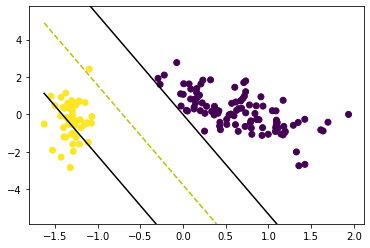

In [ ]:
visualize_svm(svm_scratch)

### Using the SVC model from scikit to compare the results.

In [ ]:
from sklearn.svm import SVC
svm_library = SVC(kernel = 'linear', random_state = 0)
svm_library.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### From the weights and bias obtained using the scikit library I can conclude that SVM from scratch and using the library gave me similar results

In [ ]:
print(svm_library.coef_, svm_library.intercept_)

[[-1.74653549 -0.31998812]] [-0.89365651]


### References: https://www.python-engineer.com/courses/mlfromscratch/07_svm/